In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, backend
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import IPython.display as display
import pathlib


In [2]:
%run Models_and_functions.ipynb


In [3]:
# fetching data
train_images = pathlib.Path('H:\\Documents\\COMP3710\\keras_png_slices_data\\keras_png_slices_data\\keras_png_slices_train\\')

train_images_list = list(train_images.glob('*.png'))
train_images = []
for image in train_images_list:
    train_images.append(str(image))
    
val_images =   pathlib.Path('H:\\Documents\\COMP3710\\keras_png_slices_data\\keras_png_slices_data\\keras_png_slices_validate\\')

val_images_list = list(val_images.glob('*.png'))
val_images = []
for image in val_images_list:
    val_images.append(str(image))
    
test_images =  pathlib.Path('H:\\Documents\\COMP3710\\keras_png_slices_data\\keras_png_slices_data\\keras_png_slices_test\\')

test_images_list = list(test_images.glob('*.png'))
test_images = []
for image in test_images_list:
    test_images.append(str(image))
    
train_labels = pathlib.Path('H:\\Documents\\COMP3710\\keras_png_slices_data\\keras_png_slices_data\\keras_png_slices_seg_train\\')

train_labels_list = list(train_labels.glob('*.png'))
train_labels = []
for label in train_labels_list:
    train_labels.append(str(label))

    
val_labels =   pathlib.Path('H:\\Documents\\COMP3710\\keras_png_slices_data\\keras_png_slices_data\\keras_png_slices_seg_validate\\')

val_labels_list = list(val_labels.glob('*.png'))
val_labels = []
for label in val_labels_list:
    val_labels.append(str(label))
    
test_labels =  pathlib.Path('H:\\Documents\\COMP3710\\keras_png_slices_data\\keras_png_slices_data\\keras_png_slices_seg_test\\')

test_labels_list = list(test_labels.glob('*.png'))
test_labels = []
for label in test_labels_list:
    test_labels.append(str(label))
    

In [4]:
# pair image with label

train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [5]:
# shuffle

train_ds = train_ds.shuffle(len(train_images))
val_ds = val_ds.shuffle(len(val_images))

In [7]:
BATCH_SIZE = 32
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [8]:
# to get palette for one hot map 
file_path1 = train_labels[0]
img = tf.io.read_file(file_path1)
decoded_image = decode_img(img)
palette = get_a_palette(decoded_image.numpy())
palette

[[1.0, 1.0, 1.0, 1.0],
 [0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 1.0],
 [0.3333333432674408, 0.3333333432674408, 0.3333333432674408, 1.0],
 [0.0, 0.0, 0.0, 1.0]]

In [9]:
# Use Dataset.map to apply this transformation.
train_ds = train_ds.map(map_fn)
val_ds = val_ds.map(map_fn)
test_ds = test_ds.map(map_fn)

In [10]:
model = unet()

In [11]:
model.summary()

Model: "unet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 256, 256, 4) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 592         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        batch_normalization[0][0]        
_______________________________________________________________________________________________

In [12]:
model.compile(optimizer="adam", loss=dice_coef_loss, metrics=[dice_coef])

In [13]:
history = model.fit(train_ds.batch(32), # using a batch size of 32
                    validation_data=val_ds.batch(32),
                    epochs=10)

Train for 302 steps, validate for 35 steps
Epoch 1/10
302/302 [==============================] - 543s 2s/step - loss: 0.0940 - dice_coef: 0.9060 - val_loss: 0.1048 - val_dice_coef: 0.8952
Epoch 2/10
302/302 [==============================] - 150s 495ms/step - loss: 0.0829 - dice_coef: 0.9171 - val_loss: 0.0819 - val_dice_coef: 0.9181
Epoch 3/10
302/302 [==============================] - 127s 421ms/step - loss: 0.0819 - dice_coef: 0.9181 - val_loss: 0.0809 - val_dice_coef: 0.9191
Epoch 4/10
302/302 [==============================] - 165s 546ms/step - loss: 0.0815 - dice_coef: 0.9185 - val_loss: 0.0809 - val_dice_coef: 0.9191
Epoch 5/10
302/302 [==============================] - 152s 503ms/step - loss: 0.0813 - dice_coef: 0.9187 - val_loss: 0.0807 - val_dice_coef: 0.9193
Epoch 6/10
302/302 [==============================] - 165s 547ms/step - loss: 0.0813 - dice_coef: 0.9187 - val_loss: 0.0806 - val_dice_coef: 0.9194
Epoch 7/10
302/302 [==============================] - 168s 556ms/step - 

In [14]:
image_test, label_test = next(iter(test_ds.batch(11)))
prediction = model.predict(image_test)

In [ ]:
print("prediction 0:")
plt.imshow(prediction[0][:,:,0])

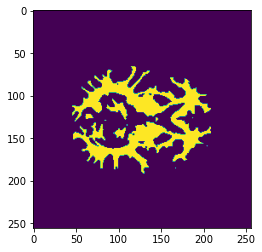

In [21]:
print("original 0:")
plt.imshow(label_test[0][:,:,0])

prediction 1:


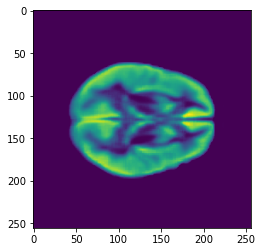

In [22]:
print("prediction 1:")
plt.imshow(prediction[0][:,:,1])

original 1:


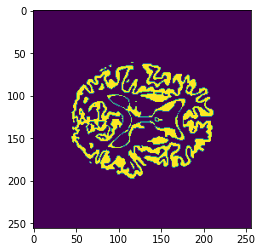

In [23]:
print("original 1:")
plt.imshow(label_test[0][:,:,1])

prediction 2:


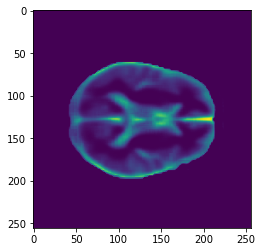

In [24]:
print("prediction 2:")
plt.imshow(prediction[0][:,:,2])

original 2:


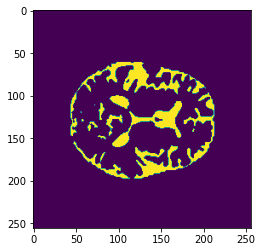

In [25]:
print("original 2:")
plt.imshow(label_test[0][:,:,2])

prediction 3:


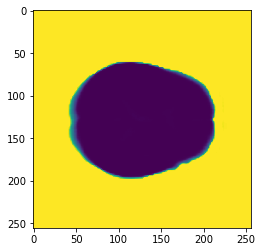

In [26]:
print("prediction 3:")
plt.imshow(prediction[0][:,:,3])

original 3:


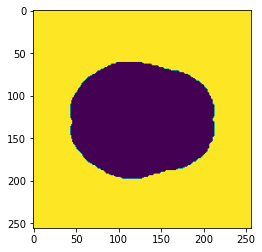

In [27]:
print("original 3:")
plt.imshow(label_test[0][:,:,3])

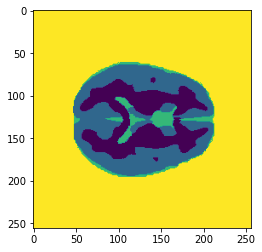

In [28]:
plt.imshow(tf.argmax(prediction[0],axis=-1))

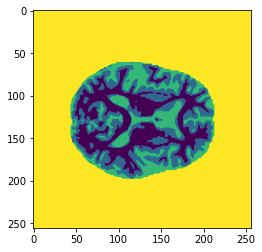

In [29]:
plt.imshow(tf.argmax(label_test[0],axis=-1))